In [2]:
import numpy as np
import scipy.linalg as lng
import seaborn as sns

In [ ]:
X = n

In [26]:
sigma = 63
mu = 300
f = lambda bins: 1 /(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )

C = 600
cells = np.arange(C)
X = lng.circulant(f(cells))
X = np.roll(X,300)



#np.random.rand(100)

In [28]:
lam, eig_vec = lng.decomp.eig(X)

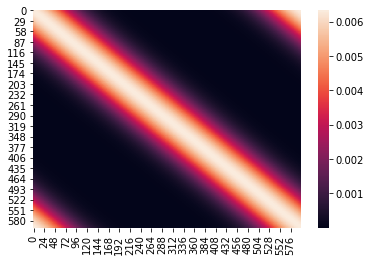

In [29]:

sns.heatmap(X)

In [15]:
lng.decomp.eig
#sns.heatmap(eig_vec[:,0]@eig_vec[:,0].T)

Signature:
lng.decomp.eig(
    a,
    b=None,
    left=False,
    right=True,
    overwrite_a=False,
    overwrite_b=False,
    check_finite=True,
    homogeneous_eigvals=False,
)
Docstring:
Solve an ordinary or generalized eigenvalue problem of a square matrix.

Find eigenvalues w and right or left eigenvectors of a general matrix::

    a   vr[:,i] = w[i]        b   vr[:,i]
    a.H vl[:,i] = w[i].conj() b.H vl[:,i]

where ``.H`` is the Hermitian conjugation.

Parameters
----------
a : (M, M) array_like
    A complex or real matrix whose eigenvalues and eigenvectors
    will be computed.
b : (M, M) array_like, optional
    Right-hand side matrix in a generalized eigenvalue problem.
    Default is None, identity matrix is assumed.
left : bool, optional
    Whether to calculate and return left eigenvectors.  Default is False.
right : bool, optional
    Whether to calculate and return right eigenvectors.  Default is True.
overwrite_a : bool, optional
    Whether to overwrite `a`; may imp

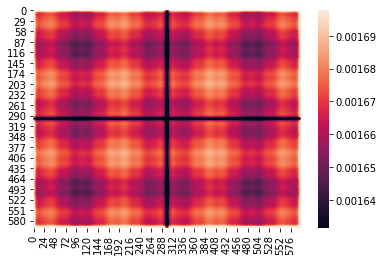

In [47]:
pc=19
sns.heatmap(np.abs(np.outer(eig_vec[:,pc],eig_vec[:,pc])),robust=True)

/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


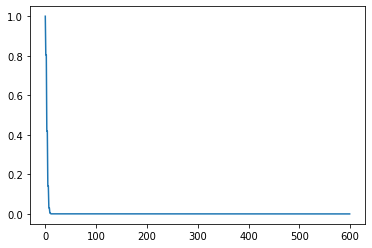

In [48]:
import matplotlib.pyplot as plt
plt.plot(lam)

In [75]:
exp_var = np.cumsum(lam)/np.sum(lam)
exp_var = exp_var[:,np.newaxis]
n_comps = np.where(exp_var>0.95)[0][0]

In [78]:
sigmas = np.linspace(10,300,20)

mu = 300
C = 600

cells = np.arange(C)
n_comps_by_sigma = np.zeros(len(sigmas))
for ii, sigma in enumerate(sigmas):
    f = lambda bins, sigma: 1 /(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
    X = lng.circulant(f(cells,sigma))
    X = np.roll(X,300)
    
    lam, eig_vec = lng.decomp.eig(X)
    
    exp_var = np.cumsum(lam)/np.sum(lam)
    exp_var = exp_var[:,np.newaxis]
    n_comps = np.where(exp_var>0.95)[0][0]

    n_comps_by_sigma[ii] = n_comps
    

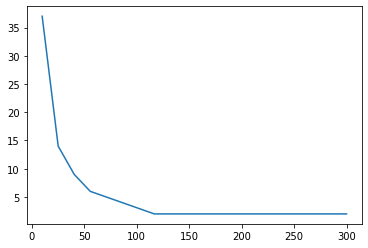

In [79]:
plt.plot(sigmas,n_comps_by_sigma)

In [5]:
models =['speed', 'hd', 'border', 'grid', 'pos']

model_codes = {'speed': 's', 'hd': 'd', 'ha': 'a', 'border': 'b', 'grid': 'g', 'pos': 'p'}

def models2codes(models):
    code = ''
    for m in models:
        code += model_codes[m] 
        
    return code

models2codes(models)

'sdbgp'

In [6]:
import numpy as np

In [22]:
models = ['speed', 'hd', 'border', 'grid', 'pos']
all_models = list(models)

In [13]:
agg_codes_submodels_dict = {
            'all': ['speed', 'hd', 'border', 'grid', 'pos'],
            'sdp': ['speed', 'hd', 'pos'],
            'sdbg': ['speed', 'hd', 'border', 'grid']}

In [18]:
agg_codes = list(agg_codes_submodels_dict.keys())
agg_models = ['agg_'+agg_code for agg_code in agg_codes]
agg_models

['agg_all', 'agg_sdp', 'agg_sdbg']

In [23]:
all_models+=agg_models
all_models

['speed', 'hd', 'border', 'grid', 'pos', 'agg_all', 'agg_sdp', 'agg_sdbg']

['speed', 'hd', 'border', 'grid', 'pos', 'agg_all', 'agg_sdp', 'agg_sdbg']

In [25]:
models, all_models

(['speed', 'hd', 'border', 'grid', 'pos'],
 ['speed', 'hd', 'border', 'grid', 'pos', 'agg_all', 'agg_sdp', 'agg_sdbg'])